In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


***Tools Used for our model ***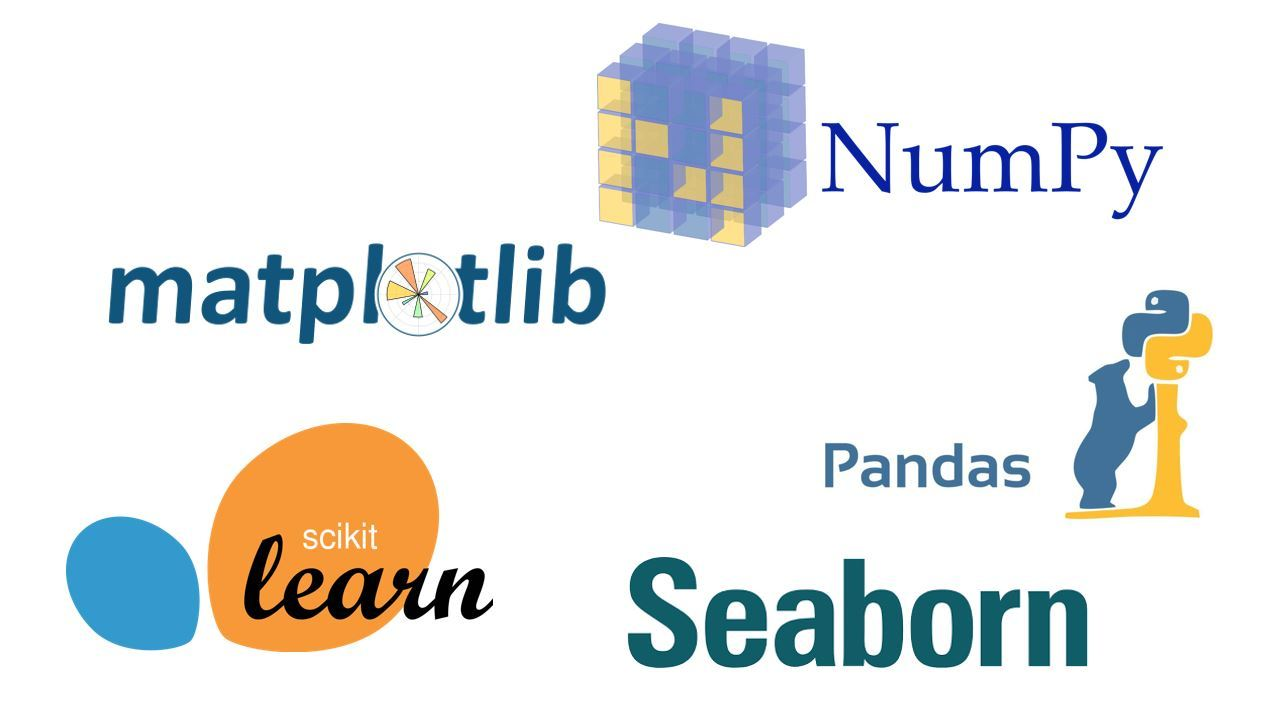

In [3]:

df = pd.read_csv('cancer_classification.csv')

In [6]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


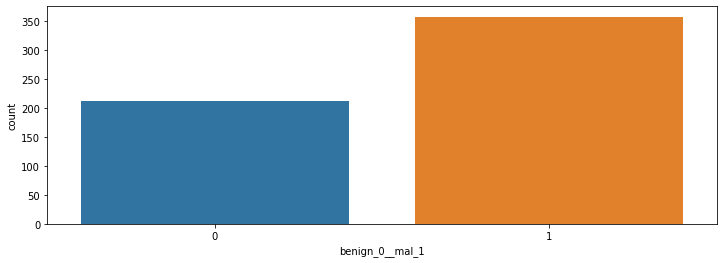

In [12]:
plt.figure(figsize=(12,4))
sns.countplot(df['benign_0__mal_1'])

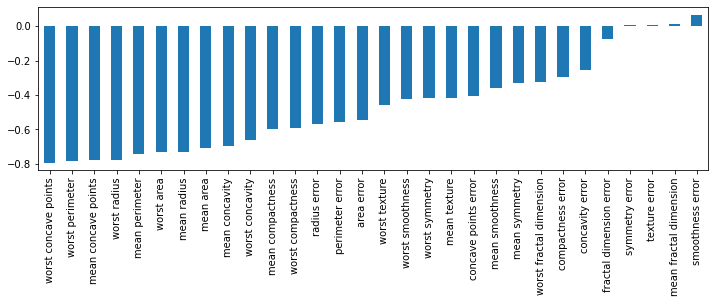

In [22]:
plt.figure(figsize=(12,3))
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

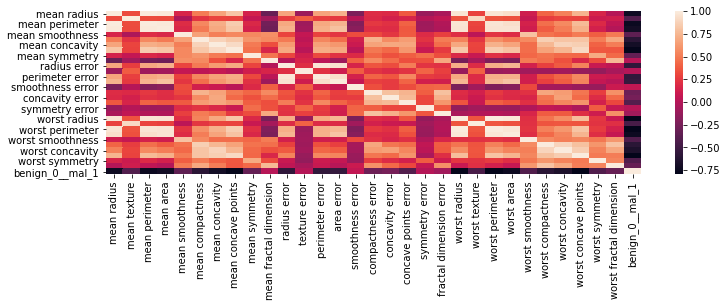

In [24]:
plt.figure(figsize=(12,3))
sns.heatmap(df.corr())

In [25]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'benign_0__mal_1'],
      dtype='object')

In [28]:
X = df.drop('benign_0__mal_1',axis=1).values

In [29]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [30]:
y = df['benign_0__mal_1'].values

**Training and validation(test) our model using sklearn..🎭**

> 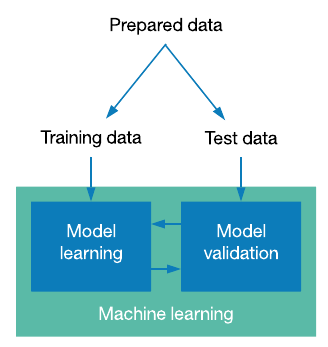



In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [36]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [41]:
X_train.shape # here 30 col thus y we pass the 30 neurons...

(426, 30)

In [42]:
model = Sequential() # creating the object ..
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

In [43]:
model.compile(optimizer='adam',loss='binary_crossentropy')

In [44]:
model.fit(x=X_train,y=y_train,epochs=600,verbose=1,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 1s 37ms/step - loss: 0.6836 - val_loss: 0.6644
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6556 - val_loss: 0.6254
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6155 - val_loss: 0.5858
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5730 - val_loss: 0.5379
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5254 - val_loss: 0.4920
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4856 - val_loss: 0.4466
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4264 - val_loss: 0.4018
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3924 - val_loss: 0.3609
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3452 - val_loss: 0.3269
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3335 - val_loss: 0.2963
Epoch 11

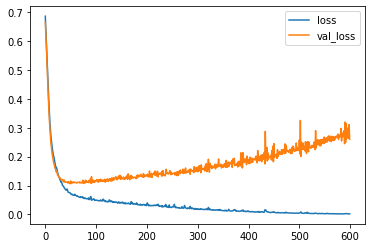

In [45]:
pd.DataFrame(model.history.history).plot()

In [46]:
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy')

**By looking the graph of our model it seems like overfitting ..**

** To prevent overfitting we have to use : -->**
* ** Callbacks from Keras  **
*   **Drop out layer from keras** 


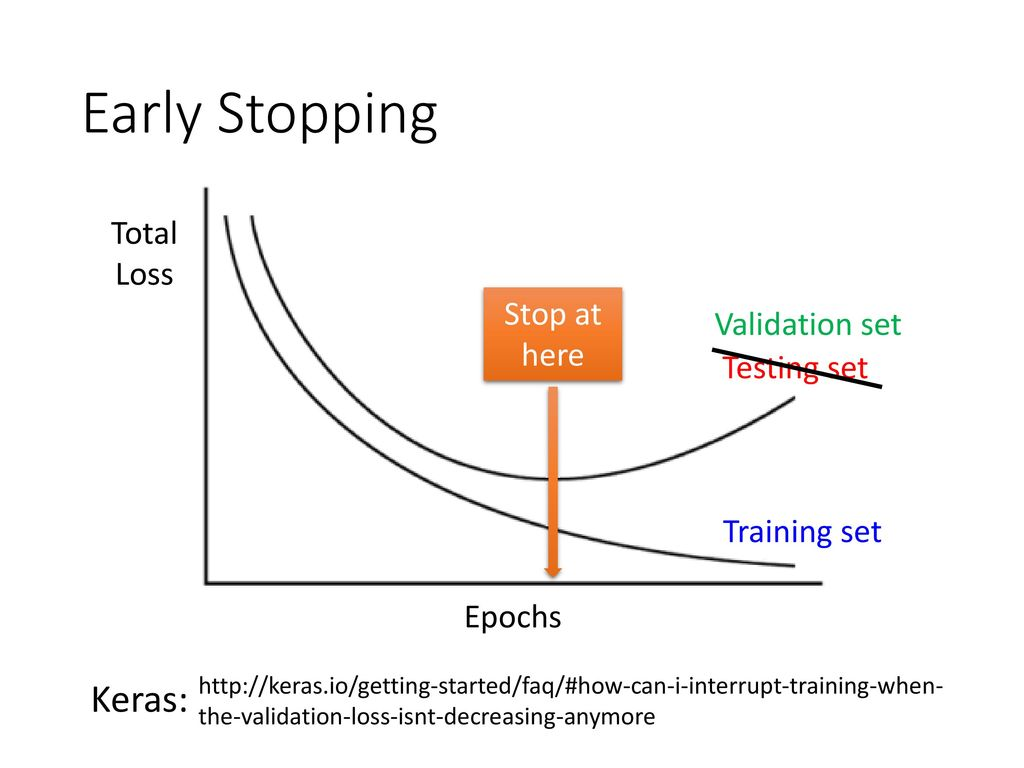




In [47]:
from tensorflow.keras.callbacks import EarlyStopping

In [48]:
early_stop = EarlyStopping(monitor='val_loss',patience=25,verbose=1,mode='min')

In [49]:
model.fit(x=X_train,y=y_train,epochs=600,verbose=1,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 14ms/step - loss: 0.7188 - val_loss: 0.6821
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6738 - val_loss: 0.6570
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6512 - val_loss: 0.6389
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6264 - val_loss: 0.6164
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6006 - val_loss: 0.6011
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5832 - val_loss: 0.5788
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5576 - val_loss: 0.5591
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5425 - val_loss: 0.5416
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5105 - val_loss: 0.5141
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4830 - val_loss: 0.4897
Epoch 11

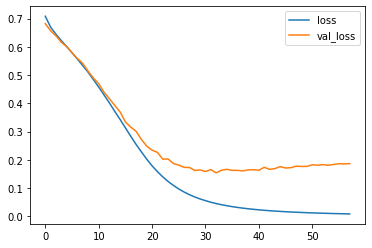

In [51]:
pd.DataFrame(model.history.history).plot()

In [55]:
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=15,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy')

We can also use drop_out layer to prevent overfitting ...
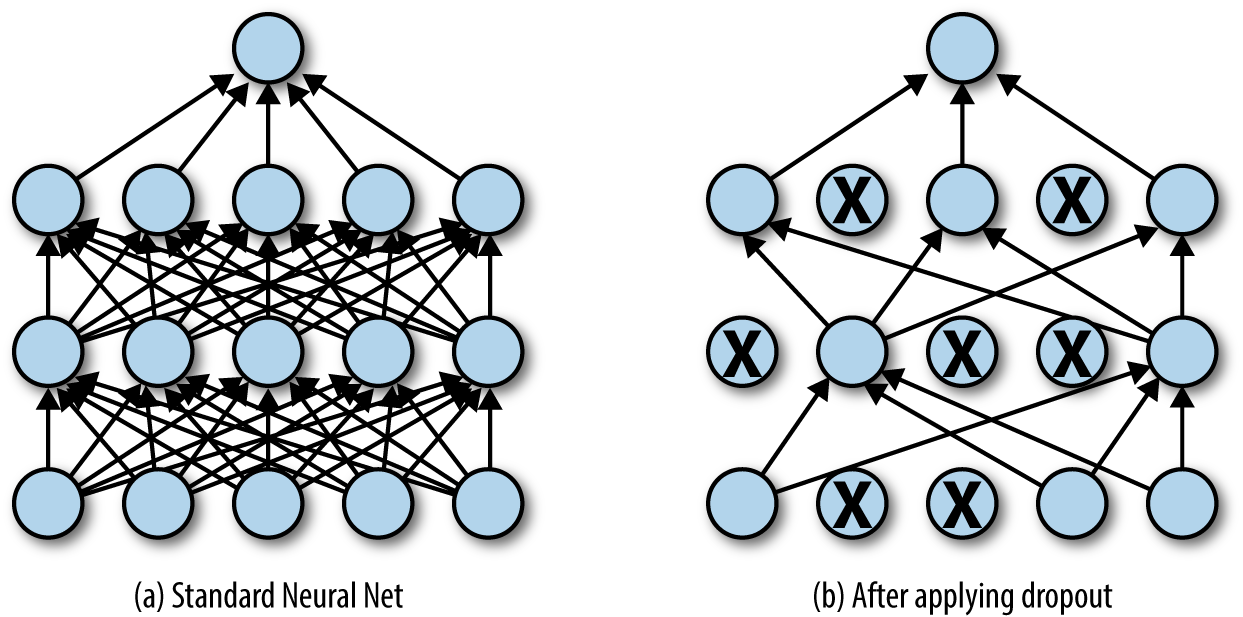

In [56]:
from tensorflow.keras.layers import Dropout
early_stop = EarlyStopping(monitor='val_loss',patience=25,verbose=1,mode='min')

In [57]:
model.fit(x=X_train,y=y_train,epochs=600,verbose=1,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 28ms/step - loss: 0.7096 - val_loss: 0.6978
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.7042 - val_loss: 0.6850
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6991 - val_loss: 0.6793
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6845 - val_loss: 0.6764
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6867 - val_loss: 0.6733
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6707 - val_loss: 0.6719
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6674 - val_loss: 0.6701
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6745 - val_loss: 0.6685
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6714 - val_loss: 0.6693
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6545 - val_loss: 0.6683
Epoch 11

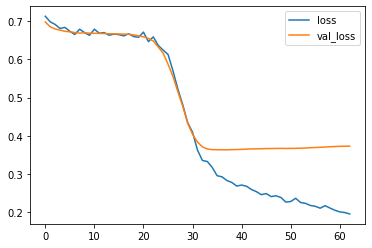

In [58]:
pd.DataFrame(model.history.history).plot()

In [61]:
predictions = model.predict_classes(X_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [62]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [63]:
accuracy_score(y_test,predictions)

0.9370629370629371

In [64]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        55
           1       0.98      0.92      0.95        88

    accuracy                           0.94       143
   macro avg       0.93      0.94      0.93       143
weighted avg       0.94      0.94      0.94       143



In [65]:
confusion_matrix(y_test,predictions)

array([[53,  2],
       [ 7, 81]])

**plotting the metrics using Seaborn(heatmap)**

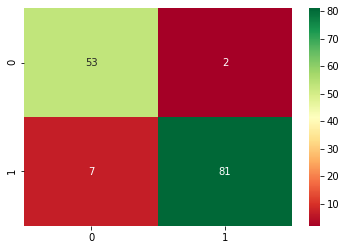

In [68]:
sns.heatmap(confusion_matrix(y_test,predictions),cmap='RdYlGn',annot=True)